In [53]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style


#Algorithms 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [54]:
df=pd.read_excel("Data_Train.xlsx")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [55]:
df_test=pd.read_excel("Data_Test.xlsx")
df_test.head(50)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703 votes
8,None,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6 votes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [58]:
#"None" is Replaced with "RESTAURANT"
df["TITLE"].replace("None","RESTAURANT" ,inplace = True)
df_test["TITLE"].replace("None","RESTAURANT" ,inplace = True)

In [59]:
df['TITLE'].value_counts()[:30]

QUICK BITES                   4218
CASUAL DINING                 3652
RESTAURANT                    1003
CAFÉ                           607
DESSERT PARLOR                 382
CASUAL DINING,BAR              349
FINE DINING                    308
BAKERY                         302
BEVERAGE SHOP                  156
BAR,CASUAL DINING              128
LOUNGE                          98
BAKERY,QUICK BITES              92
BAR                             91
FOOD COURT                      78
CASUAL DINING,CAFÉ              56
MESS                            53
KIOSK                           53
BAKERY,DESSERT PARLOR           51
PUB                             50
SWEET SHOP,QUICK BITES          48
DESSERT PARLOR,QUICK BITES      48
DHABA                           45
SWEET SHOP                      44
QUICK BITES,SWEET SHOP          35
CAFÉ,CASUAL DINING              35
BEVERAGE SHOP,QUICK BITES       33
CAFÉ,DESSERT PARLOR             32
FINE DINING,BAR                 32
FOOD TRUCK          

In [60]:
df.CUISINES.nunique()

4155

In [61]:
df['CUISINES'].value_counts()[:30]

South Indian                           532
North Indian                           526
North Indian, Chinese                  501
Fast Food                              286
Chinese                                167
Bakery                                 148
Bakery, Desserts                       148
South Indian, North Indian, Chinese    139
Cafe                                   134
Kerala                                 131
Biryani                                129
Street Food                            121
Chinese, North Indian                  119
South Indian, North Indian             106
North Indian, Mughlai                  102
North Indian, Chinese, Biryani          91
Desserts                                87
Finger Food                             87
North Indian, South Indian, Chinese     87
Ice Cream, Desserts                     81
Arabian                                 80
Bakery, Fast Food                       79
North Indian, South Indian              74
North India

In [62]:
df['CITY'].value_counts()[:40]

Chennai              2174
Bangalore            2149
Hyderabad            1819
Mumbai               1722
New Delhi            1321
Kochi                1279
Gurgaon               379
Secunderabad          310
Noida                 211
Navi Mumbai           165
Ghaziabad             102
Thane                  97
Faridabad              79
Bandra West            69
Thane West             52
Andheri West           48
Bengaluru              42
Greater Noida          31
India                  23
Kakkanad               15
Ernakulam              14
Dwarka                 10
Kerala                 10
Delhi NCR               9
Delhi                   8
Gurugram                7
Telangana               7
Edappally               7
Hyderabad.              7
Madhapur                6
Bengalore               6
Jubilee Hills           6
Maharashtra             5
Tamil Nadu              5
Banglore                4
Kilpauk                 4
Chennai.                3
Chennai Teynampet       3
Mumbai.     

In [63]:
#There are 359 Different cities that are considered in the following data set 
#we can go data segration and use Label Encoding with "City"

In [64]:
# Converting VOTES into int by splitting the data in column
#Train Dataset
#df["VOTES"].dropna(inplace = True) 
df['VOTES'] = df['VOTES'].str.split().str[0]
df['VOTES'] = df['VOTES'].astype(float)

#Test Dataset
#df_test["VOTES"].dropna(inplace = True) 
df_test['VOTES'] = df_test['VOTES'].str.split().str[0]
df_test['VOTES'] = df_test['VOTES'].astype(float)

In [65]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [66]:
#Filling Votes with 0 value inplace of Nan
df['VOTES'].fillna(0,inplace=True)
df_test['VOTES'].fillna(0,inplace=True)


#Filling Rating with -5.0 where there is Nan
#df['RATING'].fillna("-5.0",inplace=True)
#df_test['RATING'].fillna("-5.0",inplace=True)


#Train Data
df["CITY"].fillna("Unknown", inplace = True)
df["LOCALITY"].fillna("Unknown", inplace = True)


#Test Data
df_test["CITY"].fillna("Unknown", inplace = True)
df_test["LOCALITY"].fillna("Unknown", inplace = True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   LOCALITY       12690 non-null  object 
 6   RATING         12688 non-null  object 
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 892.4+ KB


In [68]:
df["RATING"].replace("-", "." ,inplace = True)
df_test["RATING"].replace("-", "." ,inplace = True)

df["RATING"].replace("NEW","-5.0" ,inplace = True)
df_test["RATING"].replace("NEW","-5.0" ,inplace = True)

In [69]:
#Train Data
df[["RATING"]] = df[["RATING"]].astype(str)
df[["VOTES"]] = df[["VOTES"]].astype(int)

#Test Data
df_test[["RATING"]] = df_test[["RATING"]].astype(str)
df_test[["VOTES"]] = df_test[["VOTES"]].astype(int)


In [70]:
df["TIME"].nunique()

2689

#Column "Time" doesnot follow a patern and it has 2689 combinations of time frames will not help in impeorving the model so we are Dropping the column "Time"
#Restaurent_Id Does not effect the target variable so it can be dropped 

In [71]:
df_test.drop(["TIME","RESTAURANT_ID"],axis=1,inplace=True)

In [72]:
df.drop(["TIME","RESTAURANT_ID"],axis=1,inplace=True)

In [73]:
df["LOCALITY"].nunique()

1417

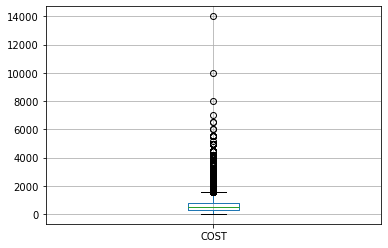

In [74]:
df.boxplot("COST")

In [75]:
df[["RATING"]] = pd.to_numeric(df['RATING'], errors='coerce')

df_test[["RATING"]] = pd.to_numeric(df_test['RATING'], errors='coerce')


In [76]:
#Filling Rating with -5.0 where there is Nan
df['RATING'].fillna("-5.0",inplace=True)

df_test['RATING'].fillna("-5.0",inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   CITY      12690 non-null  object
 3   LOCALITY  12690 non-null  object
 4   RATING    12690 non-null  object
 5   VOTES     12690 non-null  int32 
 6   COST      12690 non-null  int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 644.5+ KB


In [78]:
df["source"] = "train"
df_test["source"] = "test"
df_new = pd.concat([df,df_test])

In [79]:
#Data Transformation of Restaurent Title
df_new["TITLE"]=df_new["TITLE"].str.split(",")
TITLE ={}
for x in df_new["TITLE"].values:
    for each in x:
        each = each.strip()
        if each in TITLE:
            TITLE[each]+=1
        else:
            TITLE[each]=1
            
most_Titles = sorted(TITLE.items(),key=lambda x:x[1],reverse=True)[:25]
TITLE_list = []
for title in most_Titles:
    TITLE_list.append(title[0])
    
#print(TITLE_list)            

for title in TITLE_list:
    df_new[title] = 0

for x,y in zip(df_new['TITLE'].values, np.array([i for i in range(len(df_new))])):
    for c in x:
        c = c.strip()
        if c in TITLE_list:
            df_new[c][y] = 1

In [80]:
#Data Transformation of Cuisines
df_new["CUISINES"]=df_new["CUISINES"].str.split(",")
CUISINES ={}
for x in df_new["CUISINES"].values:
    for each in x:
        each = each.strip()
        if each in CUISINES:
            CUISINES[each]+=1
        else:
            CUISINES[each]=1
            
most_CUISINES = sorted(CUISINES.items(),key=lambda x:x[1],reverse=True)[:30]
CUISINES_list = []
for title in most_CUISINES:
    CUISINES_list.append(title[0])
    
#print(CUISINES_list)            

for cusins in CUISINES_list:
    df_new[cusins] = 0

for x,y in zip(df_new['CUISINES'].values, np.array([i for i in range(len(df_new))])):
    for c in x:
        c = c.strip()
        if c in CUISINES_list:
            df_new[c][y] = 1

In [81]:
df_new

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,source,QUICK BITES,CASUAL DINING,...,Ice Cream,Thai,American,Finger Food,Rolls,Mexican,Salad,Andhra,European,Juices
0,[CASUAL DINING],"[Malwani, Goan, North Indian]",Thane,Dombivali East,3.6,49,1200.0,train,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",Chennai,Ramapuram,4.2,30,1500.0,train,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]",Chennai,Saligramam,3.8,221,800.0,train,0,1,...,0,0,0,0,0,0,0,0,0,0
3,[QUICK BITES],"[Tibetan, Chinese]",Mumbai,Bandra West,4.1,24,800.0,train,1,0,...,0,0,0,0,0,0,0,0,0,0
4,[DESSERT PARLOR],[Desserts],Mumbai,Lower Parel,3.8,165,300.0,train,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,[CASUAL DINING],"[North Indian, Mughlai, Chinese]",New Delhi,Punjabi Bagh,3.9,287,NaN,test,1,0,...,0,0,0,0,0,0,0,0,0,0
4227,[RESTAURANT],"[Biryani, North Indian, Sandwich, Salad, W...",Bangalore,HSR Layout,4.3,469,NaN,test,1,0,...,0,0,0,0,0,0,0,0,0,0
4228,[QUICK BITES],"[Continental, North Indian]",Faridabad,Sector 86,3.7,53,NaN,test,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,[QUICK BITES],"[Rolls, Beverages]",Kochi,Kochi,-5.0,0,NaN,test,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_new['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'Unknown', 'India', 'Madhuranagar',
       'Chennai Teynampet', 'Faridabad', 'Chembur.', 'Maharashtra',
       'opp gurudwara Shakurpur', 'Telagana Land Line:040-48507016',
       'Ghaziabad', 'Karnataka', 'Kerala', 'Edappally', 'Kadavanthra',
       'Ernakulam Circle kochi', 'Bengalore', 'Near Reliance Fresh',
       'Kilpauk', 'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Kochi Elamkulam', 'Outer Ring Road',
       'Mulund East', 'Secunderabad main road near signal NMREC COLLEGE',
       'Telangana', 'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (N

In [83]:
df_new["CITY"].replace("Greater Noida","Noida" ,inplace = True)
df_new["CITY"].replace(["Chander Nagar New Delhi","New Delhi.","Delhi NCR","Delhi","Dwarka","India"],"New Delhi" ,inplace = True)
df_new["CITY"].replace(["Telangana 500003","Khairatabad","Hitech City", "West Maredpally","Hyderabad neerus emporium.","Hyderabad Behind Vacs Pastries","Metro Pillar No 21. Mettuguda main road near railway degree college.","Madhuranagar","Secunderabad main road near signal NMREC COLLEGE","Telagana Land Line:040-48507016","Mehdipatnam","Kukatpally","Kothaguda","Himayath Nagar","Manikonda","Kondapur","Kondapur.","Hyderabad.","Telangana","Madhapur","Jubilee Hills","Gachibowli","Secunderabad","Banjara Hills","Dilsukhnagar"],"Hyderabad" ,inplace = True)
df_new["CITY"].replace(["JP Nagar Bangalore","Bangalore - 560076","Whitefield Bangalore","Bangalor","Bangalore-560066","5th Main Teachers Colony Koramangala Block 1 Bangalore 560034","Karnataka 560043","Bengaluru","Banglore","Bengalore","Karnataka","Bangalore.","Marathahalli"],"Bangalore" ,inplace = True)
df_new["CITY"].replace(["Chennai Padur","Chennai - 600040","Chennai 600034.","Arumbakkam chennai-600106.","Chennai Mahabalipuram","Chennai Teynampet","Chennai.","Tamil Nadu"],"Chennai" ,inplace = True)
df_new["CITY"].replace(["Mumbai - 400007","Mumbai Mahim","Bandra West","Maharashtra","Gurugram","Andheri West","Mumbai."],"Mumbai" ,inplace = True)
df_new["CITY"].replace(["Kochi Chullickal", "Kochi-683101","Kochi Vyttila","Kochi Elamkulam","Kochi Palarivattom","Kochi International Airport VIP Road","kochi Teynampet","Kochi Ravipuram","kochi"],"Kochi" ,inplace = True)
df_new["CITY"].replace(["Thane West"],"Thane" ,inplace = True)
df_new["CITY"].replace(["Navi Mumbai."],"Navi Mumbai" ,inplace = True)
df_new["CITY"].replace(['Chembur.', 'opp gurudwara Shakurpur',
     'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Near Reliance Fresh', 'Kilpauk', 'Goregaon West', 'Kakkanad',
       'Outer Ring Road', 'Mulund East', 'Ponnuruni Kochi', 'Semmancheri',
       'Powai (Next to Powai Plaza)', 'Dombivali East', 'Kandivali',
       'Dewan Rama Road', 'Sector 51 Noida', 'Kaloor', 'Besant Nagar',
       'Adjacent To Commercial Street', '682035.','Kalyan West', 'Avadi', 'Gandipet',
       'Velachery', 'Pallavaram', 'Vijaya Nagar', 'BTM Layout',
       'Ernakulam', 'Sarjapur', 'Rohini', 'Karol Bagh', 'Perungudi',
       'Thykoodam', 'chullickal', 'Grant Road West', 'Nedumbassery',
       'MG Road', 'Naya Nagar Mira Road', 'Pitampura', 'Lower Parel',
       'HBR Layout','Rajiv gandhi Nagar', 'Medavakkam',
       'Sathya Nagar', 'p.o Kochi', 'Behind Ramalayam Temple',
       'Palarivattom', 'Brigade Road', 'Mumbai Andheri East',
       'Virar West', 'B-1 Stage', 'Chennai Kovalam', 'Aluva',
       'Telangana 500034', 'IOB Bank Kamala Nagar', 'HSR Layout',
       'Marine Drive', 'DLF Galleria', 'Nallathambi Main Road',
       'Chennai opp: Vasanth & co', 'Citypark', 'Karnataka 560103',
       'Bhayandar','Aluva Circle', 'Thammenahalli Village',
       'SG Palya', 'Attapur.', 'Near Shangrilla Bus Stop', 'Khar (west)',
       'Road 3', 'Faridabd', 'Telangana 500032', 'Mogappair. Chennai',
       'Near Munrshwara Temple', 'Off Brigade Road', 'khar west',
       'Potheri', 'Chennai Perungudi', 'Chennai Thuraipakkam',
       'OMR Karapakkam', 'Hyderabad-500032', 'Mumbai Dombivali East',
       'Chennai Thousand Lights', 'Mahim', 'Lingampally','Powai', 'New Delhi-110024',
       'Chennai- 600107', 'Kerala 683104', 'Vasai West.', 'Thane (W)',
       'Near Santosh Banjara Hyderabad',
       'Banaswadi (Next to Indian Bank) Bangalore', 'BTM Bangalore',
       'Greater Kailash 2 New Delhi', 'Secunderabad ECIL',
       'Bangalore Koramangala 7th Block', 'bangalore : 560085',
       'navi mumbai', 'Gachibowli Hyderabad',
       'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
       'ECR NEELANKARAI Chennai 600115', 'ward X11', 'Perumbavoor',
       'Mira raod east', 'Kerala 682013', 'Pokhran Road 2','Uttar Pradesh', 'Karnataka 560102',
       'Mumbai - 400013', 'Naharpar', 'Hosur Road',
       'Near Bharat Petroleum.', 'Chennai (Bang Opposite Indian Bank)',
       'Sriram nagar', 'West Mumbai', 'Vyttila',
       'MALAPALLIPURAM P .O THRISSUR', 'Andheri west Mumbai',
       'Panampilly Nagar', 'hyderabad', 'Borivali East.', 'ECIL',
       'Amrit kaur market opposite new delhi railway station paharganj',
       'Chennai Opposite 5C Bus stand', 'Telengana', 'Rajanpada',
       'Mahabalipuram', 'Secunderabad. WE HAVE NO BRANCHES.','Telangana 500081', 'Gurgoan', 'Elamakkara',
       'Sector 1', 'Bandra W', 'Kolathur', '3rd Street', 'Mumbai Chakala',
       'Borivali West', 'Rodeo Drive Sector 49', 'Pallimukku',
       'Delhi 110085', 'Sector 51', 'Champapet', 'Andavar Nagar',
       'Bangalore - 560103', 'Kerala 690525',
       'opp mukteshwar ashram powai', 'Nungambakkam', 'BK Guda',
       'Jogeshwari (w) Mumbai', 'Kukatapally','Near Sector 110 Noida', 'Navallur',
       'Beside Excellency Gardens', 'Mumbai - 80', 'Begumpet',
       'Maharaja Hotel Beside Gardania Bar', 'Ashok Vihar Phase 1',
       'Trivandrum', 'Kochi-18', 'Narayanguda', 'Thevera', 'Chennai-40',
       'Palm Beach Road', 'East Coast Road (ECR)', 'Ramapuram',
       'Chennai Chrompet', 'Nandanam', 'Saket', 'MG Road Ernakulam',
       'Andheri Lokhandwala.', 'Indiranagar', 'Thiruvanmiyur','Near Sector 110 Noida', 'Navallur',
       'Beside Excellency Gardens', 'Mumbai - 80', 'Begumpet',
       'Maharaja Hotel Beside Gardania Bar', 'Ashok Vihar Phase 1',
       'Trivandrum', 'Kochi-18', 'Narayanguda', 'Thevera', 'Chennai-40',
       'Palm Beach Road', 'East Coast Road (ECR)', 'Ramapuram',
       'Chennai Chrompet', 'Nandanam', 'Saket', 'MG Road Ernakulam',
       'Andheri Lokhandwala.', 'Indiranagar', 'Thiruvanmiyur', 'Ambattur',
       'Banglaore', 'Chennai - 34 Landmark - Near Loyola College',
       'Anna Nagar West', 'Old Railway Road', 'East Mumbai',
       'Kanakapura Road Banglore', 'Kochi Kakkanad', 'Kalyan',
       'Near Ramlila Ground','Andheri Lokhandwala','682036','Near Sector 110 Noida', 'Navallur',
       'Beside Excellency Gardens', 'Mumbai - 80', 'Begumpet',
       'Maharaja Hotel Beside Gardania Bar', 'Ashok Vihar Phase 1',
       'Trivandrum', 'Kochi-18', 'Narayanguda', 'Thevera', 'Chennai-40',
       'Palm Beach Road', 'East Coast Road (ECR)', 'Ramapuram',
       'Chennai Chrompet', 'Nandanam', 'Saket', 'MG Road Ernakulam',
       'Andheri Lokhandwala.', 'Indiranagar', 'Thiruvanmiyur', 'Ambattur',
       'Banglaore', 'Chennai - 34 Landmark - Near Loyola College',
       'Anna Nagar West', 'Old Railway Road', 'East Mumbai',
       'Kanakapura Road Banglore', 'Kochi Kakkanad', 'Kalyan',
       'Near Ramlila Ground','Serilingampally', 'Nallala Street', 'Anna Salai', 'Old Delhi',
       'Wagle Estate', '1st Stage', 'Kochi-16', 'First Street',
       'Chenn ai', '6 & 7 - 4/64 Subhash Nagar', '1st Tavarekere',
       'Perambur', 'Vaishali Ghaziabad', 'Thanisandra', 'Block F',
       'Sector 7 Dwarka', 'Opposite Barathi Gas Company', 'Vadapalani',
       'Badlapur West.', 'Kalamassery', 'Palavakkam', 'TCS Synergy park',
       'BTM 1st Stage', 'Mahadevpura', 'NEW BEL ROAD 560054',
       'Veliaveetil house Vivekananda Nagar Elamakkara', 'Sholinganallur',
       'Maharashtra 400102', 'Lower Parel West', 'Tripunithura',
       'Mogappair', 'Telangana 500070', 'JP Nagar', 'Navi-Mumbai','Ashok Nagar', 'Haridwar Apartments', 'Kerala 682001 India',
       'Karnataka 560037', 'Kerala 683585',
       'Chennai. (Near Hotel Matshya)', 'Indirapuram',
       'Begumpet Hyderabad',
       'Bangalore land mark above mahaveer hard ware', 'Kerala 682304',
       'Rajarajeshwari Nagar bangalore', 'GST Road', 'Fort Kochi',
       'Lahari Apartments', 'Ramanthapur', 'Mulund west',
       'Gurgaon Haryana India', 'New Delhi..Near by SBI bank',
       'Kochi Aluva 102', 'Phase 1 Bangalore', 'Hyderabad Manikonda',
       'Mumbai This is a Delivery & Take-away Restaurant only.',
       '10th avenue', 'Uppal', 'New Delhi 110075', 'Nizampet', 'Ulsoo',
       'Bangalore 560076', 'PVR plaza cinema building Connaught Place',
       'Gurgaon Haryana', 'Chromepet', 'Kerala 682024', 'Janakpuri',
       'Secunderabad.','chennai',
       'B.B.M.P East (Karnataka) - 560049', 'Tambaram',
       'Malleshwaram Bangalore', 'Vadapalani.', 'Dist. Center New Delhi',
       'Bangalore Road', 'aluva circle', 'Kochi.', 'Thane Mumbai',
       'Kadubesanahalli Bangalore', 'Vasai west', 'Mig Housing Society',
       'Haryana', 'Borivali West.', 'Golf Course Road', 'Khar Mumbai',
       'Near Jyothinivas College', 'Anna Nagar East', 'Masab Tank',
       'Vasai Mumbai', 'Panathur Main Road', 'Near Andheri West Station',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'APR Chambers', 'Tamil Nadu 600102', 'Maharashtra.',
       'Gandhinagar Rd', 'Near Andheri East Station', 'Whitefield',
       'Kerala 682036', 'Mira Road Thane Mumbai', 'India Gate New Delhi','Bangalore - 560095', 'Sholinganallur. Chennai',
       'Chennai (Above Bombay Brasserie)', 'Chennai 37', '682024',
       'Girgaum', 'Greater Kailash 1 (GK 1) New Delhi', 'Kurla (W)',
       'Mumbai 400015', 'Thane West Thane West', 'Kochi Panampilly Nagar',
       'Marad', 'Maharashtra 400092', 'Near Sector 34',
       'Mehdipatnam Hyderabad', 'Nallagandla', 'Vandalur', 'Mulund West',
       'Chennai 40', 'Secunderbad', 'MM Nagar', 'Mumbai 400070',
       'Chittethukkara', 'BTM', 'Dombivli', 'Sahakara Nagar',
       'Mohammad Ali Road Mumbai', 'Chennai 600040',
       'Tavarekere Main Road', 'Community Centre', 'Kerala 682022',
       'Delh.', 'Sector-6 Noida 201301', 'Kaaraikudi Complex',
       'Thiruvanmiyur (Opp Eurokids LB Road)', 'Virar Mumbai',
       'Tolichowki', 'Hyderaba', 'Kerala 682305', 'Alwarpet',
       'Kerala 682015', 'Mumbai Veera Desai Area', 'Kerala 682018',
       'Kerala 682028', 'Suraram', 'Chennai Velachery',
       'Forum Sujana Mall Opposite to Malaysian township',
       'Old Hafeezpet', 'Yousufguda', 'Chennai-600008',
       'Mumbai Ulhasnagar', 'Jogeshwari West Mumbai', 'Chepauk',
       'Chowpatty', 'Church Street', 'Balavinayagar Nagar Chennai',
       'T-Nagar Chennai', 'RA Puram',
       'Hyderabad.Star hypermarket opposite side Service road',
       'Chennai Injambakkam', 'Mumbai Mumbra', 'Habsiguda',
       'Kurla Mumbai', 'Telangana 500027', 'Chenna', 'Kerala 682021',
       'Kandivali West', 'chennai-119', 'Noida Extention',
       'Shihab Thangal Road', 'New Delhi 110011', 'Miumbai',
       'Borivali (W) Mumbai: 400 092.', 'Vanasthalipuram', 'KK Road',
       'Chennai - 600018', 'Opposite Ellora Building','Malad East'],"OTHERS" ,inplace = True)

In [84]:
df_new['CITY'].value_counts()

Bangalore      2928
Hyderabad      2923
Chennai        2875
Mumbai         2485
New Delhi      1827
Kochi          1767
Gurgaon         524
OTHERS          466
Noida           312
Navi Mumbai     224
Thane           191
Unknown         147
Ghaziabad       132
Faridabad       109
Kerala           11
Name: CITY, dtype: int64

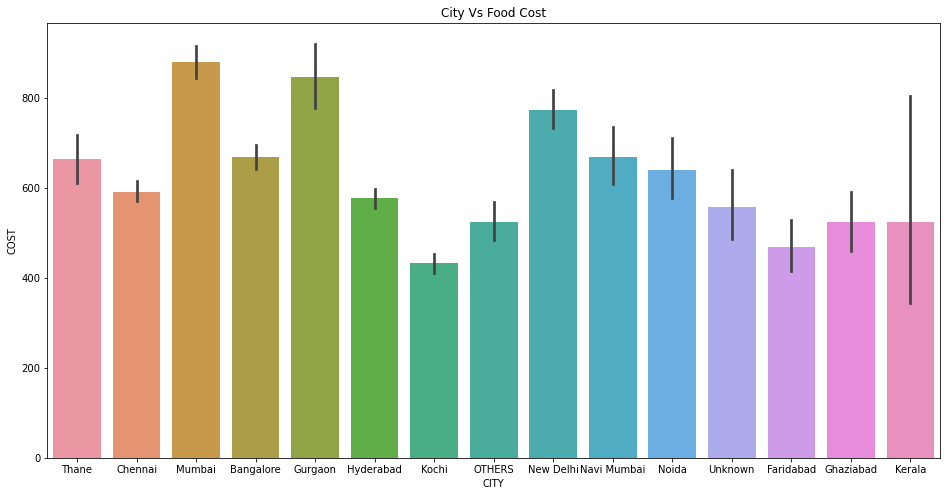

In [85]:
plt.figure(figsize=(16,8))
sns.barplot(x='CITY',y='COST',data=df_new)
plt.title("City Vs Food Cost")
plt.show()

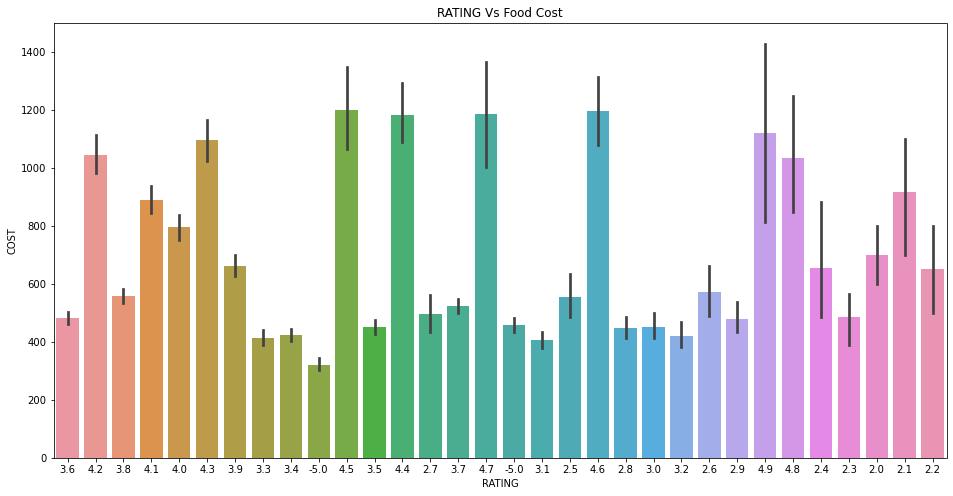

In [86]:
plt.figure(figsize=(16,8))
sns.barplot(x='RATING',y='COST',data=df_new,)
plt.title("RATING Vs Food Cost")
plt.show()

In [87]:
#Droping "TITLE" and "CUISINES"
# Combined Data
df_new.drop(["TITLE","CUISINES"],axis=1,inplace=True)


In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[["CITY","LOCALITY"]] = df_new[["CITY","LOCALITY"]].apply(le.fit_transform)
df_new

,CITY,LOCALITY,RATING,VOTES,COST,source,QUICK BITES,CASUAL DINING,RESTAURANT,CAFÉ,...,Ice Cream,Thai,American,Finger Food,Rolls,Mexican,Salad,Andhra,European,Juices
0,13,328,3.6,49,1200.0,train,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1214,4.2,30,1500.0,train,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1272,3.8,221,800.0,train,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,161,4.1,24,800.0,train,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,709,3.8,165,300.0,train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,10,1184,3.9,287,NaN,test,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4227,0,461,4.3,469,NaN,test,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,2,1370,3.7,53,NaN,test,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4229,7,642,-5.0,0,NaN,test,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CITY            16921 non-null  int32  
 1   LOCALITY        16921 non-null  int32  
 2   RATING          16921 non-null  object 
 3   VOTES           16921 non-null  int32  
 4   COST            12690 non-null  float64
 5   source          16921 non-null  object 
 6   QUICK BITES     16921 non-null  int64  
 7   CASUAL DINING   16921 non-null  int64  
 8   RESTAURANT      16921 non-null  int64  
 9   CAFÉ            16921 non-null  int64  
 10  BAR             16921 non-null  int64  
 11  DESSERT PARLOR  16921 non-null  int64  
 12  BAKERY          16921 non-null  int64  
 13  FINE DINING     16921 non-null  int64  
 14  BEVERAGE SHOP   16921 non-null  int64  
 15  LOUNGE          16921 non-null  int64  
 16  SWEET SHOP      16921 non-null  int64  
 17  PUB             16921 non-null  

In [90]:
df_new[["RATING"]] = pd.to_numeric(df_new['RATING'], errors='coerce')

In [91]:
train_final = df_new[df_new.source=="train"]
test_final = df_new[df_new.source=="test"]

In [92]:
train_final.drop("source",axis=1,inplace=True)
test_final.drop("source",axis=1,inplace=True)

In [93]:
train_final

,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,RESTAURANT,CAFÉ,BAR,...,Ice Cream,Thai,American,Finger Food,Rolls,Mexican,Salad,Andhra,European,Juices
0,13,328,3.6,49,1200.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1214,4.2,30,1500.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1272,3.8,221,800.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,161,4.1,24,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,709,3.8,165,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,5,395,3.8,546,500.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,8,158,4.3,1214,1800.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12687,9,1549,4.0,608,1300.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12688,1,720,3.5,32,400.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
train_final.COST

0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12685     500.0
12686    1800.0
12687    1300.0
12688     400.0
12689     600.0
Name: COST, Length: 12690, dtype: float64

In [95]:
y=train_final["COST"]
x=train_final.drop("COST", axis=1)

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [97]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
    if r2_score(y_train,pred_train)*100>max_scr:    
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 68.36701245801409
Testing r2_score is: 71.41315789172448
At random state 31 The model Perfomes very well
Training r2_score is: 69.040312984969
Testing r2_score is: 68.39700174574442
At random state 32 The model Perfomes very well
Training r2_score is: 71.01278141713014
Testing r2_score is: 62.37151577184121
At random state 33 The model Perfomes very well
Training r2_score is: 70.12248125730166
Testing r2_score is: 64.2173193100678
At random state 34 The model Perfomes very well
Training r2_score is: 68.57036929053852
Testing r2_score is: 70.3457126429102
At random state 35 The model Perfomes very well
Training r2_score is: 70.2402354310752
Testing r2_score is: 64.42487264111092
At random state 36 The model Perfomes very well
Training r2_score is: 69.01287231580284
Testing r2_score is: 68.35734254503227
At random state 37 The model Perfomes very well
Training r2_score is: 68.96690820624175
Testing r2_score is: 68.6627

At random state 46 The model Perfomes very well
Training r2_score is: 68.15173278130553
Testing r2_score is: 71.9400907803152
    we are going ahead with rendomstate 46

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=46)
num_folds = 10
seed = 46
scoring = 'neg_mean_squared_error'

In [99]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR())
    ]

In [100]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2*100)
    print(msg)

R2 Score with Lasso: 71.979741 
R2 Score with Linear Regression: 71.940091 
R2 Score with Decision Tree: 49.080606 
R2 Score with Ridge Regression: 71.940151 
R2 Score with KNearest Neighbors: 52.946694 
R2 Score with SVR: 10.843848 


In [101]:
#Model has perfomed well with Lasso with 71.97 R2 Score

In [102]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
model=Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
clf = GridSearchCV(model, grid, scoring=scoring, cv=cv, n_jobs =-1)
clf.fit(x_train,y_train)
print(clf.best_params_)                   

{'alpha': 0.52}


In [103]:
Ls=Lasso(alpha= 0.52)
Ls.fit(x_train,y_train)
Ls.score(x_train,y_train)
y_predLs = Ls.predict(x_test)

Lss = r2_score(y_test,y_predLs)
print("r2 score is :",Lss*100)

Lsscore=cross_val_score(Ls,x_t,y,cv=3)
Lsr=Lsscore.mean()
print("Cross value Score:",Lsr*100)

r2 score is : 71.96497745057728
Cross value Score: 68.45110077277106


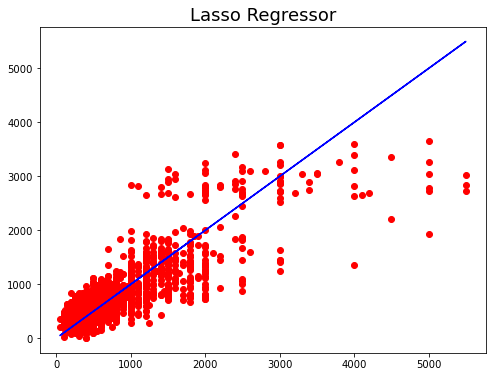

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_predLs,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Lasso Regressor",fontsize=18)
plt.show()

In [105]:
#Let Us go for Ensembling techniques and check if we can improve the score 

In [106]:
models= [AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(r2_score(y_test, predm)) 
    print("****************************************************************")
    print("\n")

[AdaBoostRegressor()]:
-0.4551269803087399
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor()]:
0.7051014873802203
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]:
0.7657914778505979
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]:
0.7436693104902494
****************************************************************




In [107]:
#GradientBoostingRegressor()Has Perfomed well comparetively let fit the model and predict the scores

In [115]:
GBR= GradientBoostingRegressor(n_estimators=100,random_state=seed)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=46)

In [116]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

predictions = GBR.predict(x_test)
GB_MAE = round(MAE(y_test, predictions),2)
GB_MSE = round(MSE(y_test, predictions),2)
GB_R2Score = round(r2_score(y_test,predictions),4)

print(f" Mean Absolute Error: {GB_MAE}\n")
print(f" Mean Squared Error: {GB_MSE}\n")
print(f" GB Score: {GB_R2Score*100}\n")

 Mean Absolute Error: 187.73

 Mean Squared Error: 93437.56

 GB Score: 76.58



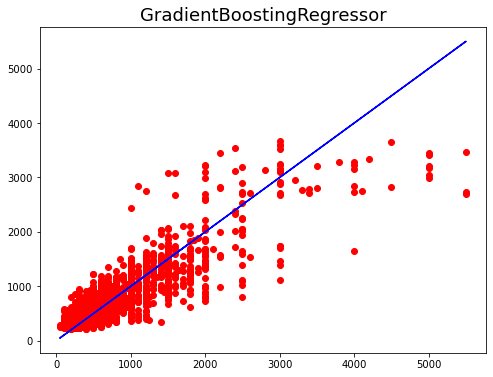

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [118]:
#GradientBoostingRegressor has perfomed best with 76.58% r2 Score 

In [119]:
import pickle
filename="GBRRestaurentfoodPred.pkl"
pickle.dump(GBR,open(filename,"wb"))

In [120]:
fit_model=pickle.load(open("GBRRestaurentfoodPred.pkl","rb"))

In [121]:
test_final.drop("COST",axis=1,inplace=True)

In [122]:
predictions=fit_model.predict(test_final)

In [123]:
df_test=pd.read_excel("Data_Test.xlsx")

In [124]:
df_test["Pred_Cost"] =fit_model.predict(test_final)

In [125]:
predictions

array([1326.98091401, 1318.3422751 , 1318.092439  , ...,  969.21091415,
        374.44865185,  969.21091415])

In [126]:
GBR_Pred = df_test[["RESTAURANT_ID","Pred_Cost"]]

In [127]:
GBR_Pred

,RESTAURANT_ID,Pred_Cost
0,4085,1326.980914
1,12680,1318.342275
2,1411,1318.092439
3,204,787.495352
4,13453,969.210914
...,...,...
4226,9057,767.421560
4227,1247,505.473088
4228,8617,969.210914
4229,6485,374.448652


In [128]:
#Lets Drop LOCALITY Column and see if the model perfomes any better or worst 
train_final.drop("LOCALITY",axis=1,inplace=True)

In [129]:
y=train_final["COST"]
x=train_final.drop("COST", axis=1)

In [130]:
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [131]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
    if r2_score(y_train,pred_train)*100>max_scr:    
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 68.35254920313182
Testing r2_score is: 71.45267700210964
At random state 31 The model Perfomes very well
Training r2_score is: 69.0374250150515
Testing r2_score is: 68.39677367287396
At random state 32 The model Perfomes very well
Training r2_score is: 71.0118809987386
Testing r2_score is: 62.36487589659544
At random state 33 The model Perfomes very well
Training r2_score is: 70.11341480609114
Testing r2_score is: 64.17974732205305
At random state 34 The model Perfomes very well
Training r2_score is: 68.56814552556119
Testing r2_score is: 70.3507828200961
At random state 35 The model Perfomes very well
Training r2_score is: 70.23638292896159
Testing r2_score is: 64.427082627672
At random state 36 The model Perfomes very well
Training r2_score is: 69.0113120617974
Testing r2_score is: 68.35820799302657
At random state 37 The model Perfomes very well
Training r2_score is: 68.96508379242651
Testing r2_score is: 68.66160

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=79)
num_folds = 10
seed = 79
scoring = 'neg_mean_squared_error'

In [133]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR())
    ]
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2*100)
    print(msg)

R2 Score with Lasso: 72.380109 
R2 Score with Linear Regression: 72.310779 
R2 Score with Decision Tree: 35.918174 
R2 Score with Ridge Regression: 72.315010 
R2 Score with KNearest Neighbors: 56.300722 
R2 Score with SVR: 13.556240 


In [134]:
GBC= GradientBoostingRegressor(n_estimators=100,random_state=seed)
GBC.fit(x_train, y_train)
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

predictions = GBC.predict(x_test)
GB_MAE = round(MAE(y_test, predictions),2)
GB_MSE = round(MSE(y_test, predictions),2)
GB_R2Score = round(r2_score(y_test,predictions),4)

print(f" Mean Absolute Error: {GB_MAE}\n")
print(f" Mean Squared Error: {GB_MSE}\n")
print(f" GB Score: {GB_R2Score*100}\n")

 Mean Absolute Error: 176.14

 Mean Squared Error: 81588.74

 GB Score: 75.96000000000001



In [135]:
#The GB's R2 Score has descrease and the Errors also have not been decrease greatly so its better we go ahead with LOCALITY inplace